# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

headers = [
    'symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 
    'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 
    'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
    'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'
]

df = pd.read_csv(url, names=headers, header=None)

df.replace('?', np.NaN, inplace=True)
df['price'] = df['price'].astype(float)
df['horsepower'] = df['horsepower'].astype(float)
df.dropna(subset=['price', 'horsepower'], axis=0, inplace=True)

In [2]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450.0


## Describe method

- Summarize statistics about data
- Remember: It doesn't show statistics about categorical data by default

In [3]:
df['city-mpg'].describe()

count    199.000000
mean      25.201005
std        6.451826
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: city-mpg, dtype: float64

In [4]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,0.839196,98.824121,174.151256,65.882412,53.775879,2556.030151,126.824121,10.178995,103.396985,25.201005,30.683417,13243.432161
std,1.257009,6.090838,12.371905,2.110996,2.447039,519.855544,41.752932,4.022424,37.553843,6.451826,6.849410,7978.707609
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.550000,64.100000,52.000000,2157.000000,97.500000,8.550000,70.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.000000,9.000000,95.000000,24.000000,30.000000,10345.000000
75%,2.000000,102.400000,183.500000,66.700000,55.550000,2930.500000,143.000000,9.400000,116.000000,30.000000,34.000000,16501.500000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,262.000000,49.000000,54.000000,45400.000000


## Value counts method

- This method is used for count categorical variables and show how many times each value appears
- See this examples where we count the drive wheels
- The values are: **Front Wheel Drive (fwd)**, **Rear Wheel Drive (rwd)** and **Four-wheel drive (4wd)**

In [5]:
drive_wheels_counts = pd.DataFrame(df['drive-wheels'].value_counts())

In [6]:
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'

In [7]:
drive_wheels_counts

,value_counts
drive-wheels,
fwd,116
rwd,75
4wd,8


We can see the Front Wheel Drive are the most commum in the data frame

## Box plots

- A way to visualize descriptive statistics
- Using a box plot we visualize:

<center>
    <img src="https://www.wellbeingatschool.org.nz/sites/default/files/W@S_boxplot-labels.png" alt="box plot image explanation (https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots#:~:text=Box%20plots%20are%20used%20to,responses%20for%20a%20large%20group.)" width="500" height="600">
</center>

Also, it's possible to visualize outliers. They appear out the lower or upper whisker

See the example above

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

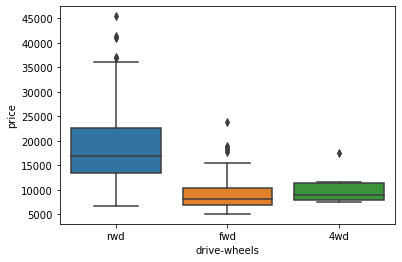

In [8]:
import seaborn as sns

sns.boxplot(x='drive-wheels', y='price', data=df)

## Scatter Plot

- Point representation is used
- Show relationship between two variables

**Variables description:**

1. **Predictor/independent** variable on x-axis
2. **Target/dependent** variable on y-axis

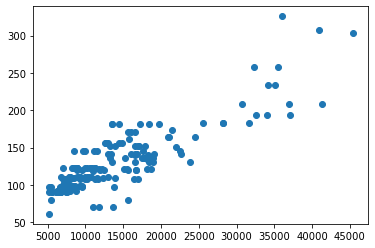

In [9]:
import matplotlib.pyplot as plt

y = df['engine-size']
x = df['price']
plt.scatter(x, y)

## Grouping Data

- Relationship between different types of data
- A great way to observate it, it's using grouping data techniques

In python, we can use the `dataframe.groupby()` method:
- Can be applied in categorical variables
- Group data into categories
- Single or multiple variables

### Example 

Find the average price of vehicles and observe how they differ between different types of body styles and drive wheels variables

In [10]:
df_test = df[['drive-wheels', 'body-style', 'price']]
df_test.head()

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0


In [11]:
df_grp = df_test.groupby(
    ['drive-wheels', 'body-style'], as_index=False).mean()

In [12]:
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8365.166667
6,fwd,sedan,9811.800000
7,fwd,wagon,10061.181818
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


## Pivot tables

- One variable displayed along the columns and the other variable displayed along the rows

In [13]:
df_pivot = df_grp.pivot(
    index='drive-wheels', 
    columns='body-style'
)

In [14]:
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8365.166667   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd           10061.181818  
rwd           16994.222222

In [15]:
df_pivot.columns

MultiIndex([('price', 'convertible'),
            ('price',     'hardtop'),
            ('price',   'hatchback'),
            ('price',       'sedan'),
            ('price',       'wagon')],
           names=[None, 'body-style'])

In [16]:
df_pivot.index

Index(['4wd', 'fwd', 'rwd'], dtype='object', name='drive-wheels')

In [17]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 4wd to rwd
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (price, convertible)  2 non-null      float64
 1   (price, hardtop)      2 non-null      float64
 2   (price, hatchback)    3 non-null      float64
 3   (price, sedan)        3 non-null      float64
 4   (price, wagon)        3 non-null      float64
dtypes: float64(5)
memory usage: 144.0+ bytes


## Heatmap

- Another way to pivot tables
- Plot target variables over multiple variables

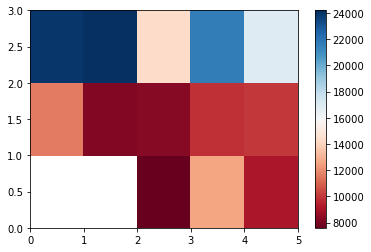

In [18]:
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

## Analisys of Variance (ANOVA)

- Statistical comparison of groups
- Example: average price of different vehicle makes

### Why do we perform ANOVA?
- Finding correlation between different groups of a categorical variable

### What we obtain from ANOVA?
- F-test score: variation between sample group means divided by variation whithin sample group
- p-value: confidence degree

In [19]:
df_anova = df[['make', 'price']]
grouped_anova = df_anova.groupby(['make'])

In [20]:
from scipy import stats
anova_result_1 = stats.f_oneway(
    grouped_anova.get_group("honda")['price'], 
    grouped_anova.get_group('subaru')['price']
)

In [21]:
anova_result_1

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

In [22]:
anova_result_2 = stats.f_oneway(
    grouped_anova.get_group('honda')['price'],
    grouped_anova.get_group('jaguar')['price']
)

In [23]:
anova_result_2

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

## Correlation

- Measures to what extent different variables are interdependent
- Example: 
    - Lung Cancer $\to$ Smoking
    - Rain $\to$ Umbrella
    
- Correlation doesn't imply causation!

### Example 1 - Positive Linear Relationship

Visualizing correlation between engine size and price

In [24]:
df[['engine-size', 'price']].head()

,engine-size,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0


(0.0, 53432.14265454957)

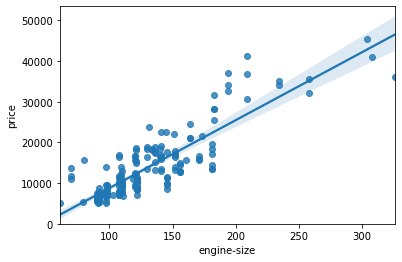

In [25]:
import seaborn as sns

sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)

As much engine size get increased, price willl be incresead as well! It shows there's a positivive correltion between these two variables

### Example 2 - Negative Linear Relationship

Correlation between highway-mpg and price

In [26]:
df[['highway-mpg', 'price']].head()

,highway-mpg,price
0,27,13495.0
1,27,16500.0
2,26,16500.0
3,30,13950.0
4,22,17450.0


(0.0, 48172.278055568764)

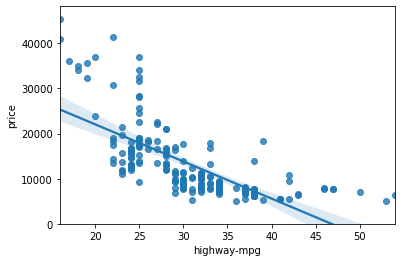

In [27]:
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

When highway mpg goes up, price goes down, so there's a negative relationship between these variables

### Example 3 - Negative Linear Relationship

Week correlation between peak-rpm and price

In [28]:
df['peak-rpm'] = df['peak-rpm'].astype(float)
df[['peak-rpm', 'price']].head()

,peak-rpm,price
0,5000.0,13495.0
1,5000.0,16500.0
2,5000.0,16500.0
3,5500.0,13950.0
4,5500.0,17450.0


(0.0, 47414.1)

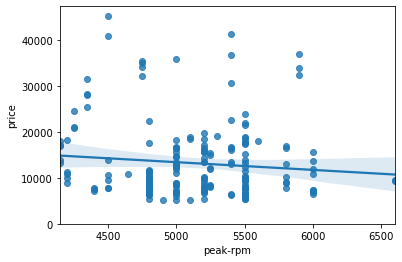

In [29]:
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)

Here, since the correlation between peak-rpm and price is weak, then we shouldn't use peak-rpm to predict prices

## Pearson Correlation

- Measure the strength of the correlation between two features
    - Correlation coeffiecient
        - Close to +1: large positive relationship
        - Close to -1: large negative relationship
        - Close to 0: No relationship
    - P-value
        - P-value < 0.001: **Strong** certainty in the result
        - P-value < 0.05 : Moderate certainty in the result
        - P-value < 0.1  : Weak certainty in the result
        - P-value > 0.1  : No certainty in the result
    
- Strong correlation
    - Correlation coefficient close to 1 or -1
    - P value less than 0.001
    

### Example 1

In [142]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])

In [145]:
print('Pearson correlation: {}'.format(pearson_coef))
print('P-value: {}'.format(p_value))

Pearson correlation: 0.8105330821322061
P-value: 1.189127827694731e-47


In [146]:
 1.189127827694731e-47 < 0.001

True

Conclusion: there's a strong positive correlation between the horsepower and price

In [148]:
df_test = df[['body-style', 'price']]
df_grp = df_test.groupby(['body-style'], as_index=False).mean()
df_grp

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9958.373134
3,sedan,14459.755319
4,wagon,12500.166667
